### Time Series 

- Values are indexed by time
- Observations captured in constant time intervals
    
#### Uniqueness of Time Series

The **same data** is captured over a **series of time intervals** and the models are also a bit **unique** to the data.

Ideally, when we collect observations, we capture **multiple** data attributes, so we apply **multivariate models** in those situations.

For time series data, the date-time attribute is the index. Date as an index provides flexibility to aggregate and disintegrate our data based on any time step.

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
np.random.seed(1)
date = [pd.Timestamp("2020-01-01"),
        pd.Timestamp("2020-01-02"),
        pd.Timestamp("2020-01-03")]
timeSeries = pd.Series(np.random.randn(len(date)), index=date)
print(timeSeries)
print(timeSeries.index)

2020-01-01    1.624345
2020-01-02   -0.611756
2020-01-03   -0.528172
dtype: float64
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq=None)


In [3]:
timeSeries['2020-01-01']

1.6243453636632417

In [4]:
timeSeries['2020-01-01':'2020-01-03']

2020-01-01    1.624345
2020-01-02   -0.611756
2020-01-03   -0.528172
dtype: float64

#### Generate Date Range (when the date values are missing)

In [5]:
# freq='B' implies business days
pd.date_range(start='2020-01-01', end='2020-01-15', freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15'],
              dtype='datetime64[ns]', freq='B')

#### Generate Date Range in Time Intervals

Ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [6]:
# Hourly Basis
pd.date_range(start="2020-01-01", periods=3, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [7]:
# By Minutes 
pd.date_range(start="2020-01-01", periods=3, freq='T')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:01:00',
               '2020-01-01 00:02:00'],
              dtype='datetime64[ns]', freq='T')

In [8]:
# By Seconds
pd.date_range(start="2020-01-01", periods=3, freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02'],
              dtype='datetime64[ns]', freq='S')

In [9]:
# Generate date-time values that are 1 day 5 hour 10 min 20 sec apart
pd.date_range(start="2020-01-01", periods=5, freq='1D5h10min20s')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-02 05:10:20',
               '2020-01-03 10:20:40', '2020-01-04 15:31:00',
               '2020-01-05 20:41:20'],
              dtype='datetime64[ns]', freq='105020S')

In [10]:
# Every Wednesday 
# W means week
pd.date_range(start="2020-01-01", periods=5, freq='W-WED')

DatetimeIndex(['2020-01-01', '2020-01-08', '2020-01-15', '2020-01-22',
               '2020-01-29'],
              dtype='datetime64[ns]', freq='W-WED')

#### Combining Indexes

In [11]:
# BAS - business year start frequency
a = pd.date_range(start="2020-01-01", periods=10, freq='BAS-JAN')
a

DatetimeIndex(['2020-01-01', '2021-01-01', '2022-01-03', '2023-01-02',
               '2024-01-01', '2025-01-01', '2026-01-01', '2027-01-01',
               '2028-01-03', '2029-01-01'],
              dtype='datetime64[ns]', freq='BAS-JAN')

In [12]:
# A - year end frequency
b = pd.date_range(start="2020-01-01", periods=10, freq='A-FEB')
b

DatetimeIndex(['2020-02-29', '2021-02-28', '2022-02-28', '2023-02-28',
               '2024-02-29', '2025-02-28', '2026-02-28', '2027-02-28',
               '2028-02-29', '2029-02-28'],
              dtype='datetime64[ns]', freq='A-FEB')

In [13]:
a.union(b)

DatetimeIndex(['2020-01-01', '2020-02-29', '2021-01-01', '2021-02-28',
               '2022-01-03', '2022-02-28', '2023-01-02', '2023-02-28',
               '2024-01-01', '2024-02-29', '2025-01-01', '2025-02-28',
               '2026-01-01', '2026-02-28', '2027-01-01', '2027-02-28',
               '2028-01-03', '2028-02-29', '2029-01-01', '2029-02-28'],
              dtype='datetime64[ns]', freq=None)

### Resampling Time Series

**Why?** - The collected time series data might not always be at uniform intervals. To study them, they have to be confined to regular time intervals.

Resampling is the process of converting our time series data from a given frequency to the desired frequency.

- Upsampling is converting the data from a low frequency to a high frequency.
- Downsampling is converting the data from a high frequency to a low frequency.

In [14]:
# Example: Customers are visiting a supermarket.
# Goal: Study customer incidence pattern at different time steps.
np.random.seed(10)
customerArrival = pd.date_range('01/01/2020 9:00', periods=600, freq='T')
custArrivalTs = pd.Series(np.random.randint(0, 100, len(customerArrival)), index=customerArrival)
custArrivalTs.head(10)

2020-01-01 09:00:00     9
2020-01-01 09:01:00    15
2020-01-01 09:02:00    64
2020-01-01 09:03:00    28
2020-01-01 09:04:00    89
2020-01-01 09:05:00    93
2020-01-01 09:06:00    29
2020-01-01 09:07:00     8
2020-01-01 09:08:00    73
2020-01-01 09:09:00     0
Freq: T, dtype: int64

In [15]:
# Downsample time-series data to get the mean customer incidence every 10 minutes
# Default aggregation is arithmetic mean
custArrivalTs.resample('10min').mean().head()

2020-01-01 09:00:00    40.8
2020-01-01 09:10:00    49.0
2020-01-01 09:20:00    52.9
2020-01-01 09:30:00    39.5
2020-01-01 09:40:00    51.9
Freq: 10T, dtype: float64

In [16]:
custArrivalTs.resample('10min').sum().head()

2020-01-01 09:00:00    408
2020-01-01 09:10:00    490
2020-01-01 09:20:00    529
2020-01-01 09:30:00    395
2020-01-01 09:40:00    519
Freq: 10T, dtype: int64

In [17]:
# Max. customer incidence at a given hour
custArrivalTs.resample('1h').max().head()

2020-01-01 09:00:00    94
2020-01-01 10:00:00    97
2020-01-01 11:00:00    99
2020-01-01 12:00:00    94
2020-01-01 13:00:00    97
Freq: H, dtype: int64

In [18]:
import random
custArrivalTs.resample('1h').apply(lambda m: random.choice(m)).head()

2020-01-01 09:00:00    30
2020-01-01 10:00:00    50
2020-01-01 11:00:00    13
2020-01-01 12:00:00    86
2020-01-01 13:00:00    17
Freq: H, dtype: int64

### Scenario: Finance Data Analysis

In [19]:
# OHLC - Open High Low Close Chart
custArrivalTs.resample('1h').ohlc().head()

,open,high,low,close
2020-01-01 09:00:00,9,94,0,75
2020-01-01 10:00:00,28,97,0,12
2020-01-01 11:00:00,30,99,0,22
2020-01-01 12:00:00,32,94,0,38
2020-01-01 13:00:00,20,97,0,67


In [20]:
np.random.seed(10)
sampleRng = pd.date_range('01/01/2020 8:00', periods=10, freq='H')
sampleTs = pd.Series(np.random.randint(0, 100, len(sampleRng)), index=sampleRng)
print(sampleTs)

2020-01-01 08:00:00     9
2020-01-01 09:00:00    15
2020-01-01 10:00:00    64
2020-01-01 11:00:00    28
2020-01-01 12:00:00    89
2020-01-01 13:00:00    93
2020-01-01 14:00:00    29
2020-01-01 15:00:00     8
2020-01-01 16:00:00    73
2020-01-01 17:00:00     0
Freq: H, dtype: int64


In [21]:
sampleTs.resample('15min').mean().head(10)

2020-01-01 08:00:00     9.0
2020-01-01 08:15:00     NaN
2020-01-01 08:30:00     NaN
2020-01-01 08:45:00     NaN
2020-01-01 09:00:00    15.0
2020-01-01 09:15:00     NaN
2020-01-01 09:30:00     NaN
2020-01-01 09:45:00     NaN
2020-01-01 10:00:00    64.0
2020-01-01 10:15:00     NaN
Freq: 15T, dtype: float64

#### How to resolve NaN issues in above example?

Use **Forward** or **Backward** filling to fill missing values.

In [22]:
# Forward Filling
sampleTs.resample('15min').ffill().head(10)

2020-01-01 08:00:00     9
2020-01-01 08:15:00     9
2020-01-01 08:30:00     9
2020-01-01 08:45:00     9
2020-01-01 09:00:00    15
2020-01-01 09:15:00    15
2020-01-01 09:30:00    15
2020-01-01 09:45:00    15
2020-01-01 10:00:00    64
2020-01-01 10:15:00    64
Freq: 15T, dtype: int64

In [23]:
# Backward filling
sampleTs.resample('15min').bfill().head(10)

2020-01-01 08:00:00     9
2020-01-01 08:15:00    15
2020-01-01 08:30:00    15
2020-01-01 08:45:00    15
2020-01-01 09:00:00    15
2020-01-01 09:15:00    64
2020-01-01 09:30:00    64
2020-01-01 09:45:00    64
2020-01-01 10:00:00    64
2020-01-01 10:15:00    28
Freq: 15T, dtype: int64

In [24]:
# Forward Filling with Limited Values
sampleTs.resample('15min').ffill(limit=2).head(10)

2020-01-01 08:00:00     9.0
2020-01-01 08:15:00     9.0
2020-01-01 08:30:00     9.0
2020-01-01 08:45:00     NaN
2020-01-01 09:00:00    15.0
2020-01-01 09:15:00    15.0
2020-01-01 09:30:00    15.0
2020-01-01 09:45:00     NaN
2020-01-01 10:00:00    64.0
2020-01-01 10:15:00    64.0
Freq: 15T, dtype: float64

Forward or Backward filling might not be accurate. The better approach would be to get **more accurate insights** from time-series data itself using **interpolation**.

In [25]:
interEx = sampleTs.resample('15min').mean()
print(interEx.head(10))
print(interEx.interpolate().head(10))

2020-01-01 08:00:00     9.0
2020-01-01 08:15:00     NaN
2020-01-01 08:30:00     NaN
2020-01-01 08:45:00     NaN
2020-01-01 09:00:00    15.0
2020-01-01 09:15:00     NaN
2020-01-01 09:30:00     NaN
2020-01-01 09:45:00     NaN
2020-01-01 10:00:00    64.0
2020-01-01 10:15:00     NaN
Freq: 15T, dtype: float64
2020-01-01 08:00:00     9.00
2020-01-01 08:15:00    10.50
2020-01-01 08:30:00    12.00
2020-01-01 08:45:00    13.50
2020-01-01 09:00:00    15.00
2020-01-01 09:15:00    27.25
2020-01-01 09:30:00    39.50
2020-01-01 09:45:00    51.75
2020-01-01 10:00:00    64.00
2020-01-01 10:15:00    55.00
Freq: 15T, dtype: float64


### Time Zones

In [26]:
import pytz 
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

Note: UTC is the coordinated universal timezone.

In [27]:
usEastTz = pytz.timezone('US/Central')
usEastTz

<DstTzInfo 'US/Central' LMT-1 day, 18:09:00 STD>

Localization is the first step towards standardizing the time zone. Any specific time stamp is first localized to a given time zone.

In [28]:
# Parameter tz is used for localization. Alternatively, use tz_localize() fn.

np.random.seed(10)
timeZoneRng = pd.date_range('01/01/2020 09:30', periods=6, freq='D', tz='UTC')
timeZoneTs = pd.Series(np.random.randn(len(timeZoneRng)), index=timeZoneRng)
print("Timezone: {}".format(timeZoneTs.index.tz))
print(timeZoneTs)

Timezone: UTC
2020-01-01 09:30:00+00:00    1.331587
2020-01-02 09:30:00+00:00    0.715279
2020-01-03 09:30:00+00:00   -1.545400
2020-01-04 09:30:00+00:00   -0.008384
2020-01-05 09:30:00+00:00    0.621336
2020-01-06 09:30:00+00:00   -0.720086
Freq: D, dtype: float64


In [29]:
timeZoneTs.tz_convert('US/Eastern')

2020-01-01 04:30:00-05:00    1.331587
2020-01-02 04:30:00-05:00    0.715279
2020-01-03 04:30:00-05:00   -1.545400
2020-01-04 04:30:00-05:00   -0.008384
2020-01-05 04:30:00-05:00    0.621336
2020-01-06 04:30:00-05:00   -0.720086
Freq: D, dtype: float64

In [30]:
sampleTimeStamp =  pd.Timestamp('2020-04-01 04:00')
print(sampleTimeStamp)
print(sampleTimeStamp.tz)
timeStamp_utc = sampleTimeStamp.tz_localize('UTC')
print(timeStamp_utc)
print(pd.Timestamp('2020-04-01 04:00:00+0000', tz='UTC'))
print(timeStamp_utc.tz_convert('US/Eastern'))
print(pd.Timestamp('2020-04-01 00:00:00-0400', tz='US/Eastern'))

2020-04-01 04:00:00
None
2020-04-01 04:00:00+00:00
2020-04-01 04:00:00+00:00
2020-04-01 00:00:00-04:00
2020-04-01 00:00:00-04:00


#### Daylight Savings

To offset the time based on Daylight Savings, we can use the **DateOffset()** function.

In [31]:
from pandas.tseries.offsets import Hour
# 30 minutes before DST transition
# Transition happens at 2:00 A.M.
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
print(stamp)
print(stamp + Hour())
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
print(stamp)
print(stamp + 2 * Hour())

2012-03-12 01:30:00-04:00
2012-03-12 02:30:00-04:00
2012-11-04 00:30:00-04:00
2012-11-04 01:30:00-05:00


### Plotting the Time-Series

2020-01-01   -7
2020-02-01   -2
2020-03-01   -3
2020-04-01   -2
2020-05-01   -5
Freq: MS, dtype: int64


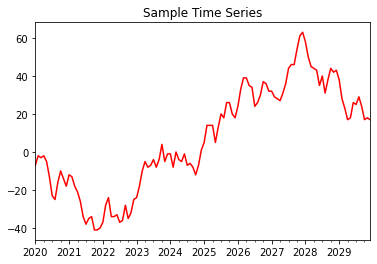

In [32]:
%matplotlib inline 
np.random.seed(20)
sampleRng = pd.date_range(start='2020', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
print(sampleTs.head())
sampleTs.plot(c='r', title='Sample Time Series')

2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2022-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2024-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2026-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2028-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2030-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: 2A-DEC, dtype: object

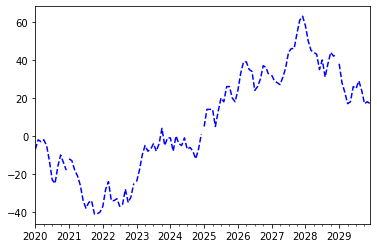

In [33]:
# Resample the time-series annually
sampleTs.resample('2A').plot(c='b', ls='--')

2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2025-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2030-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: 5A-DEC, dtype: object

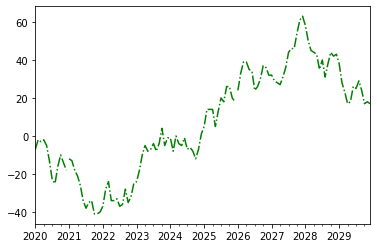

In [34]:
sampleTs.resample('5A').plot(c='g', ls='-.')

#### TODO: Plot the above plots in one single plot.

#### Lag Plot

- The Lag Plot is a very important and useful visualization for Time Series data.
- Time Series is a Univariate data.

    In the lag plot, we plot the actual data against the data with a time lag. This helps in determining how the current data is predicting the future data.

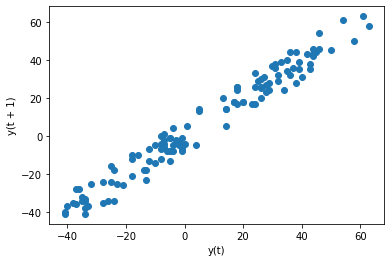

In [35]:
from pandas.plotting import lag_plot
lag_plot(sampleTs)

#### Auto Correlation Plot

    In the lag plot, we have just seen how the data is scattered when plotted against the one-time lag.

    Auto Correlation refers to correlating the data with itself. Here, we are correlating the data with a one-time lag.

    The plot gives a more accurate picture of how the data point is correlated among themselves.

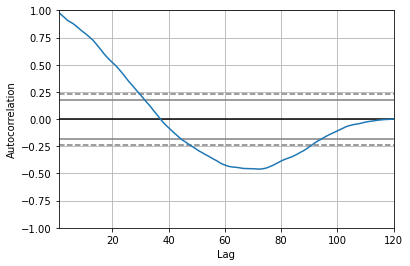

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sampleTs)

#### Note: When the autocorrelation plot shows an exponential behavior, the time series is stationary.

**Stationarity**

- Stationarity is a very significant property in Time Series Analysis. In Time series, data is collected at different time intervals. The data might behave in a deterministic or stochastic nature.
- Models can be applied only when your data is deterministic. If the nature of the data is **stochastic**, then the model results will **not be interpretable**. Hence we have to check this property before applying the model.

**What is Stationarity?**

- In statistical terms, the mean, variance and the temporal correlation remain constant over time.
- A simpler definition is that there are no seasonal or trend components in the time series.

**How to Check for Stationarity?**

- Data Visualization: You can look at your data and see if there are any trends or patterns. This is a very crude approach.
- Summary Statistics: You can take some summary statistics at different time intervals and see how the data behaves.
- Statistical Tests: You can apply certain specific statistical tests and check if your time series supports stationarity property.

**Augmented Dickey-Fuller test**

- ADF test is the best way to determine if the time series data is stationary or not.
- This kind of test is known as Unit Root Test.
- The main objective of this test is that it identifies how the trend component determines the time series.

**Statistics Behind ADF Test**

- ADF test makes use of an **autoregressive model** and optimizes its criteria across multiple lag values.
- The Null Hypothesis supposes that the time series is non-stationary.
- The alternate hypothesis is that the time series is stationary.

**Interpreting the Results**

- Null Hypothesis: H0 - If accepted then the time series data is non-stationary, and it has a unit root.
- Alternate Hypothesis: H1 - The null hypothesis is rejected. The time series data is stationary and does not have any unit root.

**Results**

- p-value > 0.05: Accept the (H0), the data is non-stationary and has a unit root.
- p-value <= 0.05: Reject the H0, the data is stationary and does not have a unit root.

**Auto Correlation Function**

- Another way of determining stationarity is Autocorrelation Function. Here, we find the correlation between two data points that are one time step away.
- When you visualize this correlation, you can get insights on the stationarity of the time series.
- If the ACF plot is having an exponential decay, it means the time series is stationary.

**Interpreting ADF Test Results**

- The more negative the ADF statistic value is, the more likely the data is stationary.
- The ADF statistic should be compared to critical p-values that are at 1, 5, and 10%.
- If the ADF statistic value is less than the critical value at 5% and the p-value is less than 0.05, then we can reject the null hypothesis that the data is non-stationary with 95% confidence level.

In [37]:
from statsmodels.tsa.stattools import adfuller
tsResult = adfuller(sampleTs)
print(tsResult)
# Returns:
# adffloat - the test statistic.
# pvaluefloat - MacKinnon's approximate p-value based on MacKinnon (1994, 2010).
# usedlagint - the number of lags used.
# nobsint - the number of observations used for the ADF regression and calculation of the critical values.
# critical valuesdict - critical values for the test statistic at the 1%, 5%, and 10% levels based on MacKinnon (2010).
# icbestfloat - the maximized information criterion if autolag is not None.
# resstoreResultStore, optional - a dummy class with results attached as attributes.

(-0.867915592631002, 0.7983546110448015, 4, 115, {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}, 649.5116230296519)


In [38]:
print('ADF Statistic: %f' % tsResult[0])
print('p-value: %f' % tsResult[1])
for key, value in tsResult[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.867916
p-value: 0.798355
	1%: -3.489
	5%: -2.887
	10%: -2.580


The ADF Statistic value is -2.696700. It is negative but greater than the critical value at 5% level.

The p-value: 0.074611 and is greater than 0.05, so we accept the null hypothesis, which means the data is non-stationary.

In [39]:
#! curl http://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip > data.zip
#! unzip data.zip

In [40]:
dataFrame = pd.read_csv('./data/time_series_101/dow_jones_index.data', parse_dates=["date"], index_col="date")

In [41]:
closeTS = dataFrame[(dataFrame.stock == 'AA')].close.str.replace('$',' ').astype(float)

In [42]:
close_XOM_Ts = dataFrame[(dataFrame.stock == 'XOM')].close.str.replace('$',' ').astype(float)

In [43]:
tsResult = adfuller(close_XOM_Ts)
print('ADF Statistic: %f' % tsResult[0])
print('p-value: %f' % tsResult[1])
for key, value in tsResult[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.913251
p-value: 0.993261
	1%: -3.964
	5%: -3.085
	10%: -2.682


### Trends and Patterns

Time Series data have several components underlying it.

    Trend: This component shows the overall series behavior - the slow change of values over time.
    Season: This shows the changes that happen in cycles for less than a year.
    Cycles: Changes that happen for more than a year.
    Random: Anything that is not included in the above three components.

The underlying assumption has to be that the time series data is stationary.

**Steps in Time Series Analysis**

Few steps to be followed while performing time series analysis:

- Check for Stationarity.
- Decompose the model into its various components.
- Analyse the components.
- Fit the time series forecasting model and predict future values.
    
**Time Series Difference**

Apart from the decomposing the Time Series, there is another method, we can follow during analysis is the time difference.

We take the difference between two time periods. The difference can have a shift of one time period or more. This process also helps in understanding the data better.

**Decomposition**

In Python, we can use statsmodels package **seasonal_decompose** method for time series decomposing. We can just pass the time series and call the respective decomposing function to get the results.

In [44]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
sampleTs_decomp = seasonal_decompose(sampleTs, period=12) 
sampleTs_trend = sampleTs_decomp.trend 
sampleTs_seasonal = sampleTs_decomp.seasonal 
sampleTs_residual = sampleTs_decomp.resid

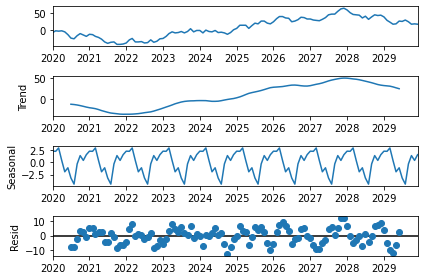

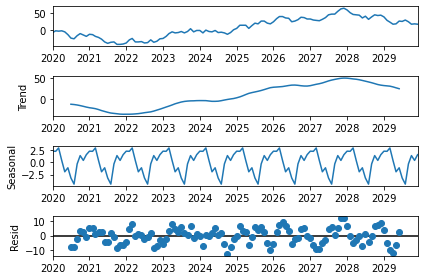

In [45]:
sampleTs_decomp.plot()

**Modeling Time Series**

So far, we have seen how to slice and dice the time series data and how to check for stationarity. The next logical step in time series analysis is forecasting. Forecasting in time series can be done in several ways.

    Autoregressive
    Moving Average
    Autoregressive Moving Average
    Autoregressive Integrated Moving Average
    
General Case:
    
    ARIMA(p, q, r) 
        - p: no. of AR terms or lags
        - q: no. of differentiation
        - r: no. of MA terms

    ARIMA (1,0,0) is equivalent to AR Model.
    ARIMA (0,0,1) is equivalent to MA model.
    ARIMA (1,0,1) is equivalent to ARMA model.
    ARIMA (0,1,0) is equivalent to random walk model.
    ARIMA (0,1,1) is equivalent to exponential smoothing model.
    
**Random Walk Model**: The coefficient of first lag is 1. In typical AR model, the coefficient is always less than 1.

$$ \hat{y}_t - y_{t-1} = \mu (constant) $$ 

=> $$ \hat{y}_t = y_{t-1} + \mu (constant) $$
    
**Exponential Smoothing Model**: Takes the average of last few observations.

The assumption is that the weight given to the recent observation will be higher than the old observations. 
    
$$ \hat{y}_t = \hat{y}_{t-1} + \alpha * \epsilon_{t-1} $$

where $$ \epsilon_{t-1} = {y}_{t-1} - \hat{y}_{t-1} $$
        
In AR model, there is no guarantee that the cofficient of \begin{equation} y_{t-1} \text{will be higher than} y_{t-2}, \end{equation} however this is the constraint for the exponential smoothing model.
    
    

**Autoregression**

In Autoregression, we use the current value of the variable to predict its future values. Here, the current and past time stamp values of the time series are used to predict the future values.

In [46]:
from statsmodels.tsa.arima_model import ARIMA 
# The parameter order = (...) is very important in calling the right function for forecasting.
# differenced first-order autoregressive model (1, 1, 0)
model = ARIMA(sampleTs, order=(1, 1, 0)) 
autoReg = model.fit()
autoReg

**Moving Average**

Moving average is another way to predict the time series data. Here, the dependent variable is expressed as a function of the previous values along with an average component. Example: 3-day moving average where 

$$ y_4 = (y_1 + y_2 + y_3) / 3; $$
$$ y_5 = (y_2 + y_3 + y_4) / 3 $$ and so on.

Average component keeps moving along the time series.

In [47]:
model = ARIMA(sampleTs, order=(0, 1, 1)) 
movingAvgRes = model.fit()

**Selecting p and q**

The p and q are parameters of the Autoregressive and Moving Average models. These parameters have to be selected by how they fit the historical data.

The AIC or BIC have to be validated among the results and the model which has the lowest value should be chosen.

- AIC stands for Akaike Information Criterion.
- BIC stands for Bayesian Information Criterion.

**ARIMA**

    ARIMA is the combination of Autoregressive and Moving Average.
    ARIMA stands for Autoregressive Integrated Moving Average.
    It is another model used for forecasting in Time Series Analysis.

In [48]:
model = ARIMA(sampleTs, order=(1, 0, 1)) 
arimares = model.fit() 

**Steps in Time Series**

The first step is to Visualize the time series.

The second step is to make the data stationary. This can be accomplished by:

 - Detrending 
 - Differencing
 - Seasonality

Getting the optimal parameters through Auto Correlation and Partial Auto Correlation.

Build Model (AR, MA, ARMA, ARIMA) using the parameters.

Make Predictions.